<a target="_blank" href="https://colab.research.google.com/github/fbenitachen/projects/blob/main/myproject-ipynb/AB_testing_with_python.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# A/B Testing Implementation in Python 📎
Use statistical tests (Chi-square and t-test) to determine if there's a statistically significant difference in engagement (CTR and conversion) between the two email subject lines.<br/>

#### <ins>Created by: Felice Benita</ins>

#### Dataset: Online Learning Platform - Email Engagement Campaign


##### Context

You're working with an online learning platform that offers various courses and certifications. The goal of this A/B test is to increase user engagement by testing two types of email subject lines aimed at encouraging users to return to the platform and resume a course they previously enrolled in.

##### Objective of the A/B Test
Analyze which email subject line variant results in a higher:
<ul><li>Click-through rate (CTR)</li>
<li>Conversion rate (resuming the course)</li></ul>

##### Data Structure

User ID: Unique identifier for each user.<br/>
Age: Age group (e.g., 18-25, 26-35, etc.) of the user, which could impact engagement levels.<br/>
Enrollment Type: Whether the user enrolled for a free trial or paid subscription.<br/>
Course Category: The category of the course enrolled in (e.g., Data Science, Marketing, Design).<br/>
Previous Engagement Level: Historical data indicating low, medium, or high engagement based on past actions.<br/>
Email Variant (A/B): The variant of the subject line used for each user (e.g., "Variant A: 'Complete Your Course in Record Time!' " or "Variant B: 'Your Learning Journey Awaits - Resume Now!'").<br/>
Click-Through Rate (CTR): Whether the user clicked the email (0 for no, 1 for yes).<br/>
Conversion Rate: Whether the user resumed their course after opening the email (0 for no, 1 for yes).<br/>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # To suppress some warnings

from sklearn import preprocessing

In [2]:
# Reading data
df = pd.read_csv('File Dirr/online_learning_email_engagement.csv')
df.head()

,User_ID,Age_Group,Enrollment_Type,Course_Category,Previous_Engagement_Level,Email_Variant,CTR,Conversion_Rate
0,User_1,26-35,Paid Subscription,Data Science,High,B,0,0
1,User_2,56+,Paid Subscription,Data Science,High,A,1,0
2,User_3,18-25,Free Trial,Data Science,Medium,A,1,0
3,User_4,56+,Paid Subscription,Marketing,Low,B,0,0
4,User_5,36-45,Paid Subscription,Programming,Medium,B,0,0


#### Distribution of CTR and Conversion Rate

In [3]:
df['Email_Variant'] = pd.Categorical(df['Email_Variant'], ['A','B'])

<Axes: xlabel='CTR', ylabel='Count'>

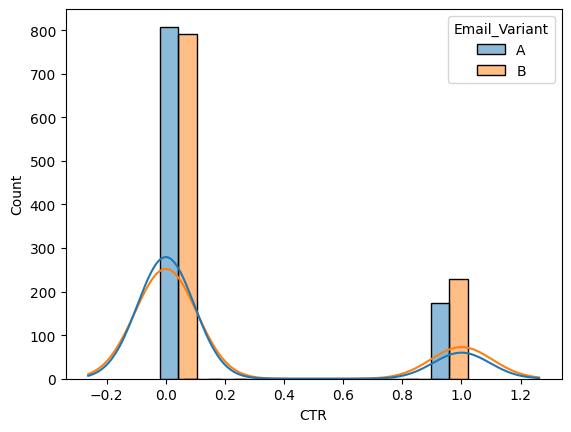

In [4]:
sns.histplot(data=df, x="CTR", hue="Email_Variant", multiple="dodge", kde=True, shrink=1.5, kde_kws=dict(cut=3))

<Axes: xlabel='Conversion_Rate', ylabel='Count'>

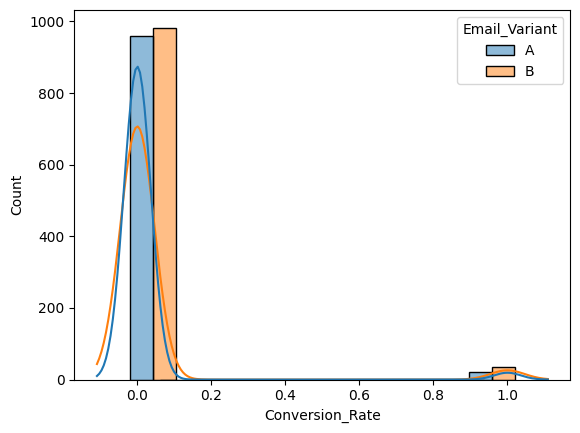

In [5]:
sns.histplot(data=df, x="Conversion_Rate", hue="Email_Variant", multiple="dodge", kde=True, shrink=1.5, kde_kws=dict(cut=3))

<span style="color: #383dc4; font-size: 18px; font-weight:bold;">T-Test</span>

In [6]:
from scipy.stats import ttest_ind

# Separate the data for each email variant
clicks_A = df[df['Email_Variant'] == 'A']['CTR']
clicks_B = df[df['Email_Variant'] == 'B']['CTR']

conversions_A = df[df['Email_Variant'] == 'A']['Conversion_Rate']
conversions_B = df[df['Email_Variant'] == 'B']['Conversion_Rate']

# Perform t-tests for click-through rate and conversion rate
t_stat_click, p_val_click = ttest_ind(clicks_A, clicks_B, equal_var=False)
t_stat_conversion, p_val_conversion = ttest_ind(conversions_A, conversions_B, equal_var=False)

# Display the results
print("A/B Testing Results Using T-Test:")
print(f"Click-Through Rate T-Test: t-statistic = {t_stat_click:.3f}, p-value = {p_val_click:.3f}")
print(f"Conversion Rate T-Test: t-statistic = {t_stat_conversion:.3f}, p-value = {p_val_conversion:.3f}")

# Interpretation
if p_val_click < 0.05:
    print("The difference in Click-Through Rates between variants A and B is statistically significant.")
else:
    print("The difference in Click-Through Rates between variants A and B is not statistically significant.")

if p_val_conversion < 0.05:
    print("The difference in Conversion Rates between variants A and B is statistically significant.")
else:
    print("The difference in Conversion Rates between variants A and B is not statistically significant.")

A/B Testing Results Using T-Test:
Click-Through Rate T-Test: t-statistic = -2.654, p-value = 0.008
Conversion Rate T-Test: t-statistic = -1.880, p-value = 0.060
The difference in Click-Through Rates between variants A and B is statistically significant.
The difference in Conversion Rates between variants A and B is not statistically significant.


##### = Slice data by user demographics (age & enrollment type) to see if certain groups respond better to one email variant over another. =

In [7]:
from scipy.stats import ttest_ind

# Define demographic groups to analyze
demographic_groups = ['Age_Group', 'Enrollment_Type']
results = []

for group in demographic_groups:
    print(f"\nAnalyzing response rates by '{group}' and Email Variant\n")
    
    # Loop through each unique value in the demographic group
    for val in df[group].unique():
        # Filter data by the current demographic value
        subgroup = df[df[group] == val]
        
        # Separate data for each email variant within the demographic subgroup
        clicks_A = subgroup[subgroup['Email_Variant'] == 'A']['CTR']
        clicks_B = subgroup[subgroup['Email_Variant'] == 'B']['CTR']
        
        conversions_A = subgroup[subgroup['Email_Variant'] == 'A']['Conversion_Rate']
        conversions_B = subgroup[subgroup['Email_Variant'] == 'B']['Conversion_Rate']
        
        # Perform t-tests for click-through rate and conversion rate
        t_stat_click, p_val_click = ttest_ind(clicks_A, clicks_B, equal_var=False)
        t_stat_conversion, p_val_conversion = ttest_ind(conversions_A, conversions_B, equal_var=False)
        
        # Append results for each demographic value
        results.append({
            'Demographic Group': group,
            'Demographic Value': val,
            'Click-Through Rate T-Statistic': t_stat_click,
            'Click-Through Rate P-Value': p_val_click,
            'Conversion Rate T-Statistic': t_stat_conversion,
            'Conversion Rate P-Value': p_val_conversion
        })
        
        # Display results
        print(f"'{group}' = {val}")
        print(f"CTR T-Test: t-statistic = {t_stat_click:.3f}, p-value = {p_val_click:.3f}")
        print(f"Conversion Rate T-Test: t-statistic = {t_stat_conversion:.3f}, p-value = {p_val_conversion:.3f}")
        print("-" * 50)

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)
print("\nSummary of t-test results for each demographic group:")
print(results_df)


Analyzing response rates by 'Age_Group' and Email Variant

'Age_Group' = 26-35
CTR T-Test: t-statistic = -2.187, p-value = 0.029
Conversion Rate T-Test: t-statistic = -0.482, p-value = 0.630
--------------------------------------------------
'Age_Group' = 56+
CTR T-Test: t-statistic = -0.943, p-value = 0.346
Conversion Rate T-Test: t-statistic = -1.546, p-value = 0.123
--------------------------------------------------
'Age_Group' = 18-25
CTR T-Test: t-statistic = -0.372, p-value = 0.710
Conversion Rate T-Test: t-statistic = 0.782, p-value = 0.435
--------------------------------------------------
'Age_Group' = 36-45
CTR T-Test: t-statistic = -1.129, p-value = 0.260
Conversion Rate T-Test: t-statistic = -2.689, p-value = 0.008
--------------------------------------------------
'Age_Group' = 46-55
CTR T-Test: t-statistic = -1.365, p-value = 0.173
Conversion Rate T-Test: t-statistic = -0.470, p-value = 0.639
--------------------------------------------------

Analyzing response rates by

<span style="color: #383dc4; font-size: 18px; font-weight:bold;">Chi-Square Test</span>

In [8]:
# Keep a copy data
data = df.copy()

In [9]:
from scipy.stats import chi2_contingency
warnings.simplefilter(action='ignore', category=FutureWarning)

# Summarize data for the A/B test
ab_summary = data.groupby('Email_Variant').agg(
    total_clicks=('CTR', 'sum'),
    total_users=('User_ID', 'count'),
    total_conversions=('Conversion_Rate', 'sum')
).reset_index()

# Calculate click-through rate and conversion rate per email variant
ab_summary['CTR'] = ab_summary['total_clicks'] / ab_summary['total_users']
ab_summary['Conversion_Rate'] = ab_summary['total_conversions'] / ab_summary['total_users']

# Create contingency table for click-through rates
click_contingency = pd.crosstab(df['Email_Variant'], data['CTR'])

# Chi-square test for independence to compare click-through rates
chi2_click, p_click, _, _ = chi2_contingency(click_contingency)

# Create contingency table for conversion rates
conversion_contingency = pd.crosstab(data['Email_Variant'], data['Conversion_Rate'])

# Chi-square test for independence to compare conversion rates
chi2_conversion, p_conversion, _, _ = chi2_contingency(conversion_contingency)

# Display the results
ab_summary[['Email_Variant', 'CTR', 'Conversion_Rate']].round(3), p_click, p_conversion

(  Email_Variant    CTR  Conversion_Rate
 0             A  0.176            0.021
 1             B  0.224            0.035,
 0.009574780481740784,
 0.08254156333647118)

##### = Slice data by user demographics (age & enrollment type) to see if certain groups respond better to one email variant over another. =

In [10]:
import pandas as pd
from scipy.stats import chi2_contingency
warnings.simplefilter(action='ignore', category=FutureWarning)

# Grouping data by demographics (e.g., Age Group, Enrollment Type) and Email Variant
demographic_groups = ['Age_Group', 'Enrollment_Type']
results = []

for group in demographic_groups:
    print(f"\nAnalyzing response rates by '{group}' and Email Variant")
    
    # Group by demographic attribute and email variant
    demographic_summary = data.groupby([group, 'Email_Variant']).agg(
        total_clicks=('CTR', 'sum'),
        total_users=('User_ID', 'count'),
        total_conversions=('Conversion_Rate', 'sum')
    ).reset_index()
    
    # Calculate CTR and Conversion Rate within each group and email variant
    demographic_summary['CTR'] = demographic_summary['total_clicks'] / demographic_summary['total_users']
    demographic_summary['Conversion_Rate'] = demographic_summary['total_conversions'] / demographic_summary['total_users']
    print(demographic_summary[['Email_Variant', group, 'CTR', 'Conversion_Rate']])

    # Pivot the data to create a contingency table for CTR
    for val in df[group].unique():
        click_contingency = pd.crosstab(data[data[group] == val]['Email_Variant'], 
                                        data[data[group] == val]['CTR'])
        conversion_contingency = pd.crosstab(data[data[group] == val]['Email_Variant'], 
                                             data[data[group] == val]['Conversion_Rate'])
        
        # Chi-square tests
        chi2_click, p_click, _, _ = chi2_contingency(click_contingency)
        chi2_conversion, p_conversion, _, _ = chi2_contingency(conversion_contingency)
        
        # Collect and display results
        results.append({
            'Demographic Group': group,
            'Demographic Value': val,
            'CTR P-Value': p_click,
            'Conversion Rate P-Value': p_conversion
        })
        
        print(f"\n'{group}' = {val}")
        print(f"CTR p-value: {p_click}, Conversion Rate p-value: {p_conversion}")

# Display the summarized test results
results_df = pd.DataFrame(results)
print("\nSummary of p-values for each demographic group and variant:")
print(results_df)


Analyzing response rates by 'Age_Group' and Email Variant
  Email_Variant Age_Group       CTR  Conversion_Rate
0             A     18-25  0.196809         0.026596
1             B     18-25  0.212121         0.015152
2             A     26-35  0.169014         0.028169
3             B     26-35  0.254545         0.036364
4             A     36-45  0.179348         0.000000
5             B     36-45  0.226316         0.036842
6             A     46-55  0.146739         0.032609
7             B     46-55  0.198157         0.041475
8             A       56+  0.188679         0.018868
9             B       56+  0.226804         0.046392

'Age_Group' = 26-35
CTR p-value: 0.039618619254737926, Conversion Rate p-value: 0.8334912270345369

'Age_Group' = 56+
CTR p-value: 0.4095815077051188, Conversion Rate p-value: 0.1965843836129775

'Age_Group' = 18-25
CTR p-value: 0.8052847370903811, Conversion Rate p-value: 0.6661291492433739

'Age_Group' = 36-45
CTR p-value: 0.31731256459846024, Conversio

<br/>
<span style="color: #191970; font-size: 16px; font-weight:bold;">Created by: Felice Benita</span>